# TaylorF2EccPerAdvFD1PN injection and parameters recovered with TaylorF2EccPerAdvFD leading order
## minimum-frequency=20Hz
## injected-parameters:
### chirp_mass = 8.264298149225912, mass_ratio = 0.819047619047619
### SNR = 41.62079657160877
### injection_parameters = dict(mass_1=10.5, mass_2=8.6, eccentricity=0.08, luminosity_distance=280., theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

#### 14:59 bilby INFO    : Sampling time: 6:38:20.982694
#### 14:59 bilby INFO    : Summary of results:
#### nsamples: 10379
#### ln_noise_evidence: -16630.609
#### ln_evidence: -15807.587 +/-  0.249
#### ln_bayes_factor: 823.022 +/-  0.249

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import bilby

In [2]:
result = bilby.result.read_in_result("TaylorF2EccPerAdvFDLeadingOrder_recovery_result.json")

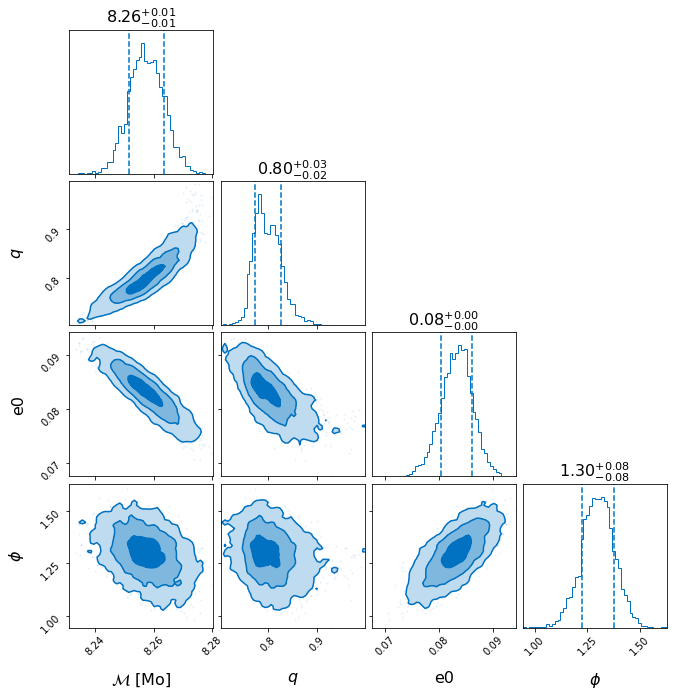

In [4]:
result.plot_corner(outdir='.')

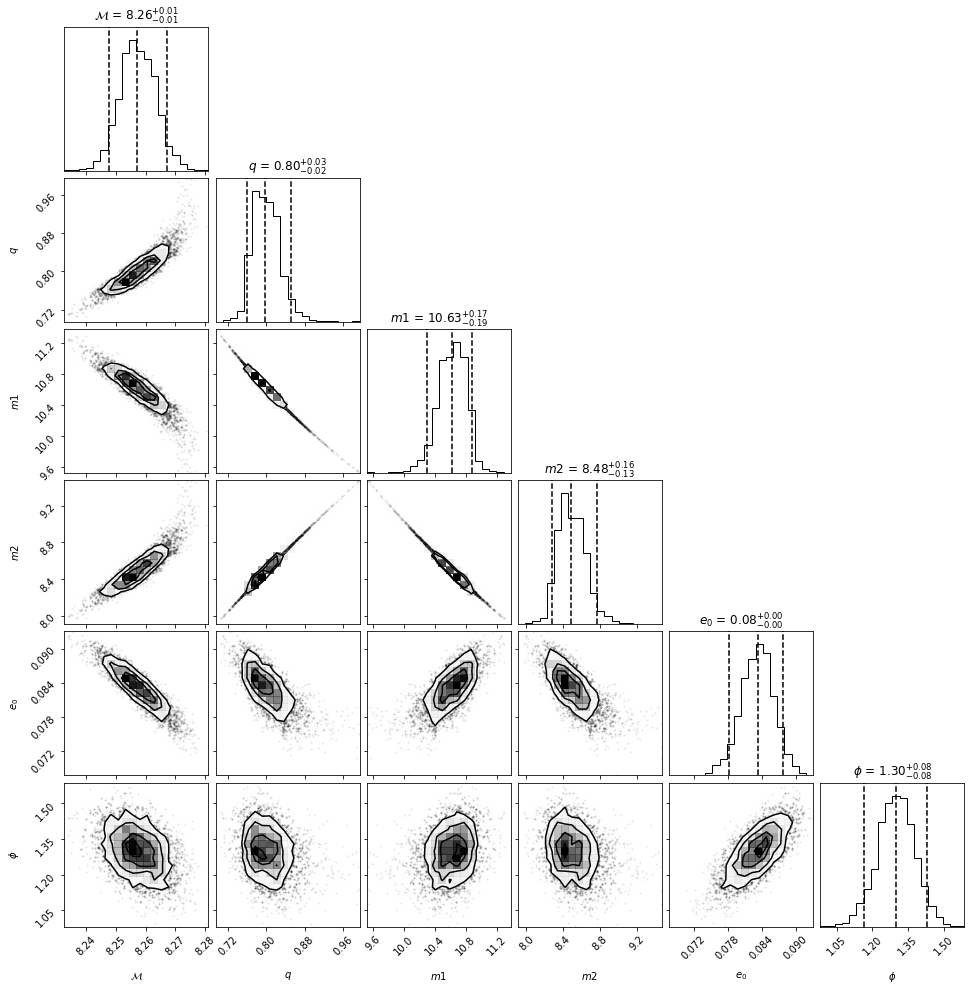

In [3]:
chirp_mass_ = result.posterior["chirp_mass"].values
mass_ratio_ =  result.posterior["mass_ratio"].values
e0 = result.posterior["eccentricity"].values
phi = result.posterior["phase"].values

m1 = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
m2 = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)

data = np.transpose(np.array([chirp_mass_,mass_ratio_,m1, m2,e0,phi]))
figure = corner.corner(data, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\phi$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})